In [82]:
## Import Libraries 
import numpy as np                            ## adds powerful data structures to python to perform mathematical operations on arrays.
import pandas as pd                           ## library perform general eda.
import seaborn as sns                         ## data visualization library based on matplotlib to provide statistical graphs. 
from matplotlib import pyplot as plt          ## creates quality static, animated, and visualizations in python.
import plotly.express as px
import time
import warnings
warnings.filterwarnings("ignore")             ## controls whether warnigns are ignored, displayed, or turned into errors.

#### Load Data And Explore Data

In [83]:
## Load the dataset
df = pd.read_csv("/Users/kevineddy/Desktop/Data Projects/Superstore-timeseries/train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

### Data Cleaning

In [85]:
# fixing null values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [86]:
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [87]:
# add postal code for Burlington, VT
df['Postal Code'].fillna(5401,inplace=True)

In [88]:
# test isnull
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [89]:
# fix column datatypes
df.sample(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
3141,3142,US-2015-122959,12/12/2015,12/12/2015,Same Day,CY-12745,Craig Yedwab,Corporate,United States,San Antonio,Texas,78207.0,Central,OFF-BI-10003650,Office Supplies,Binders,GBC DocuBind 300 Electric Binding Machine,210.392
8263,8264,CA-2016-138457,13/09/2016,17/09/2016,Standard Class,AM-10705,Anne McFarland,Consumer,United States,Jacksonville,North Carolina,28540.0,South,OFF-BI-10000014,Office Supplies,Binders,Heavy-Duty E-Z-D Binders,13.092


In [177]:
# change date data from strings to datetime datatypes 
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [92]:
## don't need row id, so lets drop that ish 
df = df.drop(['Row ID'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9800 non-null   float64       
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

### Data Analysis & Visualizations

In [93]:
## 1) Top 15 Cities with Highest Sales
top_cities = df.groupby('City').sum().sort_values('Sales', ascending=False).head(15)

top_cities['Sales'] = top_cities['Sales'].round(2)
top_cities = top_cities.reset_index()

In [94]:
fig = px.bar(top_cities, x ='City', y ='Sales', title = 'Top 15 Cities with Highest Sales')
fig.show()

In [95]:
## 2) Top 15 States with the highest Sales
top_states = df.groupby('State').sum().sort_values('Sales', ascending=False).head(15)

top_states['Sales'] = top_states['Sales'].round(2)
top_states = top_states.reset_index()

In [96]:
fig = px.bar(top_states, x='State', y='Sales', title='Top 15 States with Highest Sales')
fig.show()

In [97]:
## 3) Shipping Mode
fig = px.pie(df, names = 'Ship Mode', title= 'Ship Mode', values=np.ones(df.shape[0]), color_discrete_sequence=px.colors.sequential.RdBu)

fig.show()

In [98]:
## 4) Customer Segments
fig = px.pie(df, names='Segment', title='Segment', values=np.ones(df.shape[0]), color_discrete_sequence=px.colors.sequential.Aggrnyl)

fig.show()

In [99]:
## 5) Category
fig = px.pie(df, names='Category', title='Category', values=np.ones(df.shape[0]), color_discrete_sequence=px.colors.sequential.algae)

fig.show()

In [100]:
## 6) Which Category has the most sales
top_sales_category = df.groupby('Category').sum()['Sales'].reset_index()

fig = px.pie(top_sales_category, names='Category', values='Sales', title='Category with most Sales', color_discrete_sequence=px.colors.sequential.deep)

fig.show()

In [101]:
## 7) Sub-Category
fig = px.pie(df,names='Sub-Category', values=np.ones(df.shape[0]), title='Sub-Category', color_discrete_sequence=px.colors.sequential.Mint)

fig.show()

In [102]:
## 8) Region with the Most Sales 
top_sales_region = df.groupby('Region').sum().reset_index()

fig = px.pie(top_sales_region, names='Region', values='Sales', title='Regions With The Highest Sales', color_discrete_sequence=px.colors.sequential.Darkmint)

fig.show()

In [103]:
## 9) Segment with the Most Sales 
top_sales_segment = df.groupby('Segment').sum().reset_index()

fig = px.pie(top_sales_segment, names='Segment', values='Sales', title='Segment With The Highest Sales', color_discrete_sequence=px.colors.sequential.RdBu)

fig.show()

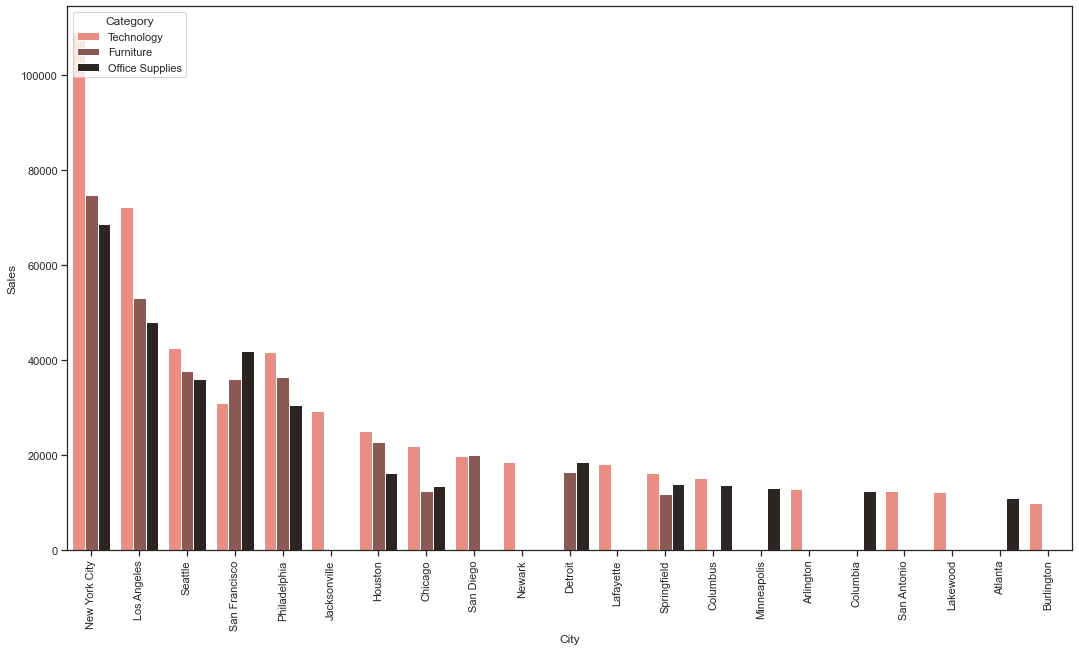

In [179]:
## 9) Top Category Across City By Sales
plt.figure(figsize=(18,10))

top_cities = df.groupby(['Category','City']).sum().sort_values('Sales',ascending=False).head(40)
top_cities= top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)

sns.barplot(x='City',y='Sales',hue='Category',data=top_cities,palette='dark:salmon_r')
plt.xticks(rotation='vertical')
plt.show()

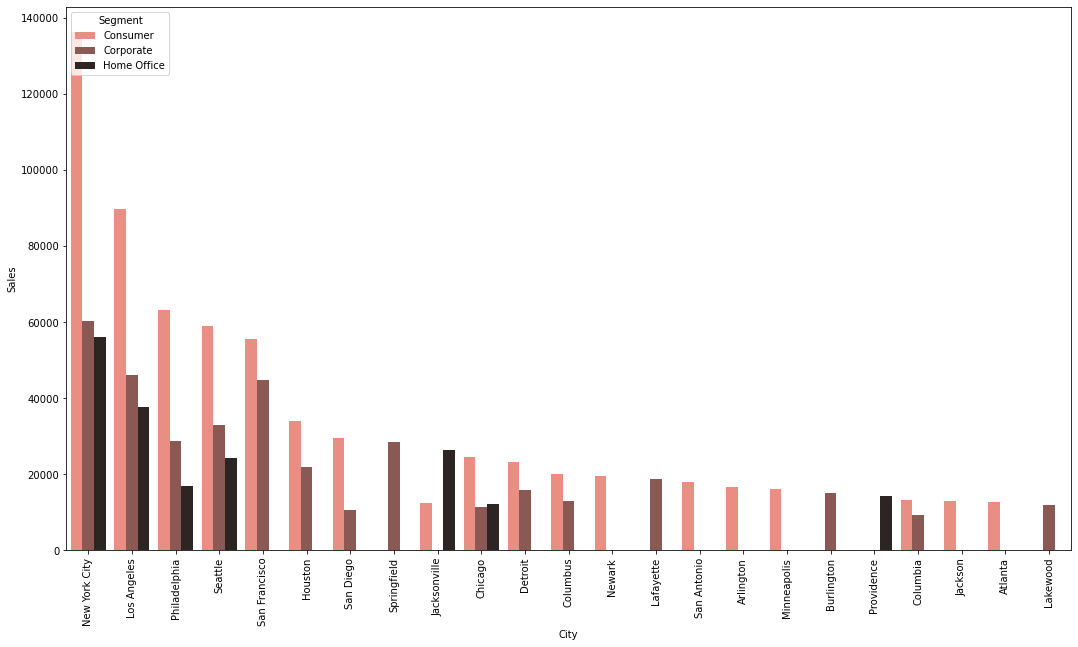

In [105]:
## 10) Top Segment Across City by Sales
plt.figure(figsize= (18,10))

top_cities = df.groupby(['City', 'Segment']).sum().sort_values('Sales', ascending=False).head(40)
top_cities = top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)

sns.barplot(x='City',y='Sales', hue='Segment', data=top_cities, palette='dark:salmon_r')
plt.xticks(rotation='vertical')
plt.show()

#### Analysis Overview
- NYC has the most sales across cities
- California has the most sales across states
- Standard Shipping Class was the most used shipping option
- The largest segment of customers were consumers
- Most orders were of Office Supplies 
- Technology products consisted of the most sales
- The majority of orders consisted of Office Supplies
- Most orders consisted of binders
- The West Region was the largest contributor of sales
- Consumers contributed to the majority of sales
- Using the last two figures, we can identify the most popular categories and consumer segemts across the top performing cities. This info will allow us to better personalize ad campaigns across these regions as well as make better sales projections.

#### Additional EDA 

In [106]:
# sorting data by order date
#df.sort_values(by=['Order Date'], inplace=True, ascending=True)

In [107]:
# setting the index to be the date will help later when we start forecasting 
#f.set_index("Order Date", inplace=True)

In [108]:
# Identify the most valuable customers
# valueable customer are those who buy more frequently or higher ticket items

#sort customers by sales
top_customers = df.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False).head(15)

#round sales by 2 decimal places
top_customers = top_customers[['Sales']].round(2)

#because we used groupby we'll need to reset the index to include the customer names into the df
top_customers.reset_index(inplace=True)

In [109]:
# create bar graph
fig = px.bar(top_customers, x ='Customer Name', y ='Sales', title = 'Most Valuable Customers')
fig.show()

In [113]:
# identify what years df includes
df['Order Date'].dt.year.unique()

array([2017, 2016, 2015, 2018])

<AxesSubplot:>

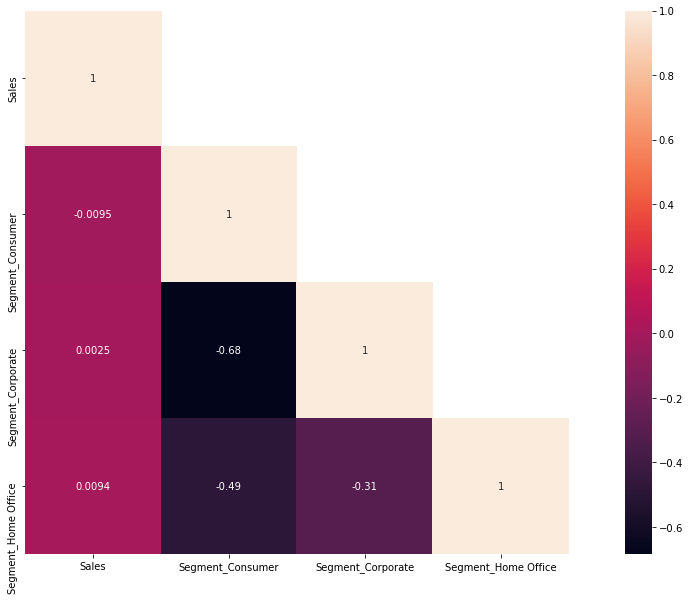

In [120]:
# Correlation Features
# By plotting a correlation matrix, we'll be able to see how well the features are related to one another.  For a Pandas dataframe, we can
# use the call .corr which by defualt provides the Pearson Correlation values of the columns pairwise in that dataframe.

# Correlation between Segment and Sales
df1 = df[['Segment', 'Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.heatmap(data = cor_mat, mask = mask, square=True, annot=True, cbar=True)



<AxesSubplot:>

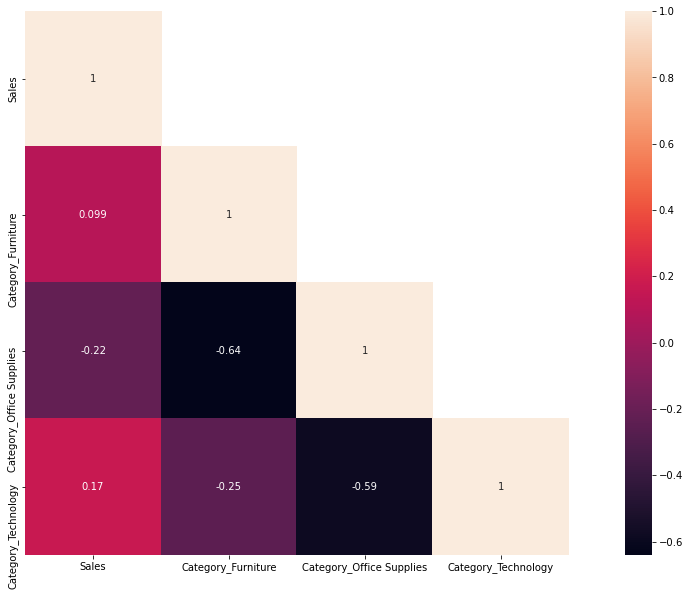

In [122]:
# correlation between Category and Sales
df1 = df[['Category', 'Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True)



<AxesSubplot:>

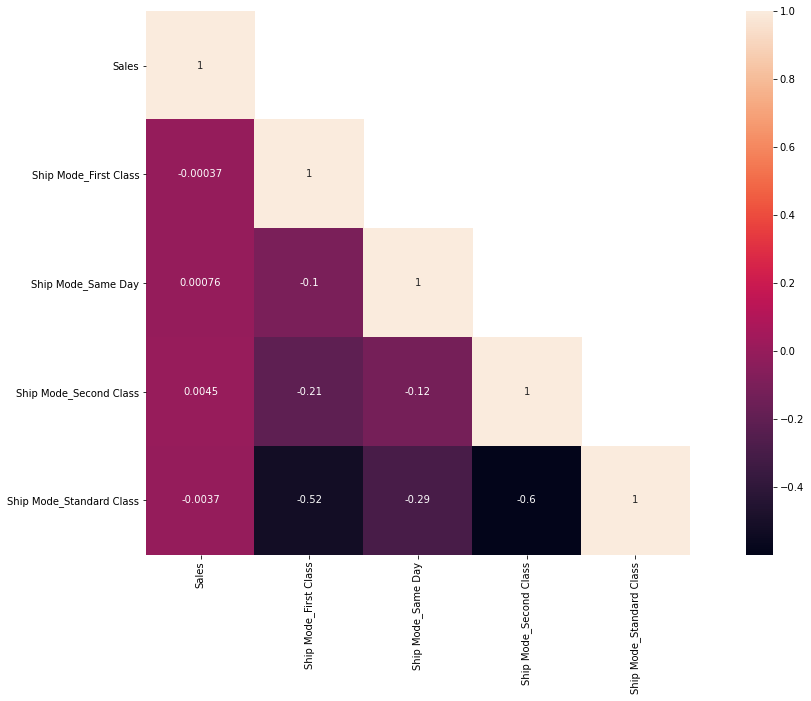

In [123]:
df1 = df[['Ship Mode', 'Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot=True, cbar=True)

In [126]:
df_train = df
df_train.shape

(9800, 17)

In [128]:
# summarize sales data
df_train.describe().drop(['Postal Code'], axis=1)

,Sales
count,9800.000000
mean,230.769059
std,626.651875
min,0.444000
25%,17.248000
50%,54.490000
75%,210.605000
max,22638.480000


In [131]:
# find the range of dates in the order list
print('Oldest \'Order Date\': ' + str(min(df_train["Order Date"])))
print('Most Recent \'Order Date\': ' + str(max(df_train["Order Date"])))

Oldest 'Order Date': 2015-01-02 00:00:00
Most Recent 'Order Date': 2018-12-30 00:00:00


In [132]:
# Identify Nominal Data
df_train.nunique()

Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       627
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

In [145]:
# count values 
df_train['Segment'].unique()
print('Unique Name and Count with \nSegment\n\n' + str(df_train['Segment'].value_counts()))
print('-------------------------------------')
print('Unique Name and Count with \nShip Mode\n\n' + str(df_train['Ship Mode'].value_counts()))
print('-------------------------------------')
print('Unique Name and Count with \nRegion\n\n' + str(df_train['Region'].value_counts()))
print('-------------------------------------')
print('Unique Name and Count with \nCategory\n\n' + str(df_train['Category'].value_counts()))
print('-------------------------------------')
print('Unique Name and Count with Sub-Category\n\n' + str(df_train['Sub-Category'].value_counts()))

Unique Name and Count with 
Segment

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64
-------------------------------------
Unique Name and Count with 
Ship Mode

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64
-------------------------------------
Unique Name and Count with 
Region

West       3140
East       2785
Central    2277
South      1598
Name: Region, dtype: int64

-------------------------------------
Unique Name and Count with 
Category

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64
-------------------------------------
Unique Name and Count with Sub-Category

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases     

In [146]:
# calculate log of sales
df_train['Log_of_Sales'] = [np.log(s) for s in df_train['Sales']]
df_train.describe()

,Postal Code,Sales,Log_of_Sales
count,9800.000000,9800.000000,9800.000000
mean,55217.343265,230.769059,4.111104
std,32066.750532,626.651875,1.646014
min,1040.000000,0.444000,-0.811931
25%,23223.000000,17.248000,2.847696
50%,57551.000000,54.490000,3.998017
75%,90008.000000,210.605000,5.349984
max,99301.000000,22638.480000,10.027406


<Figure size 1080x576 with 0 Axes>

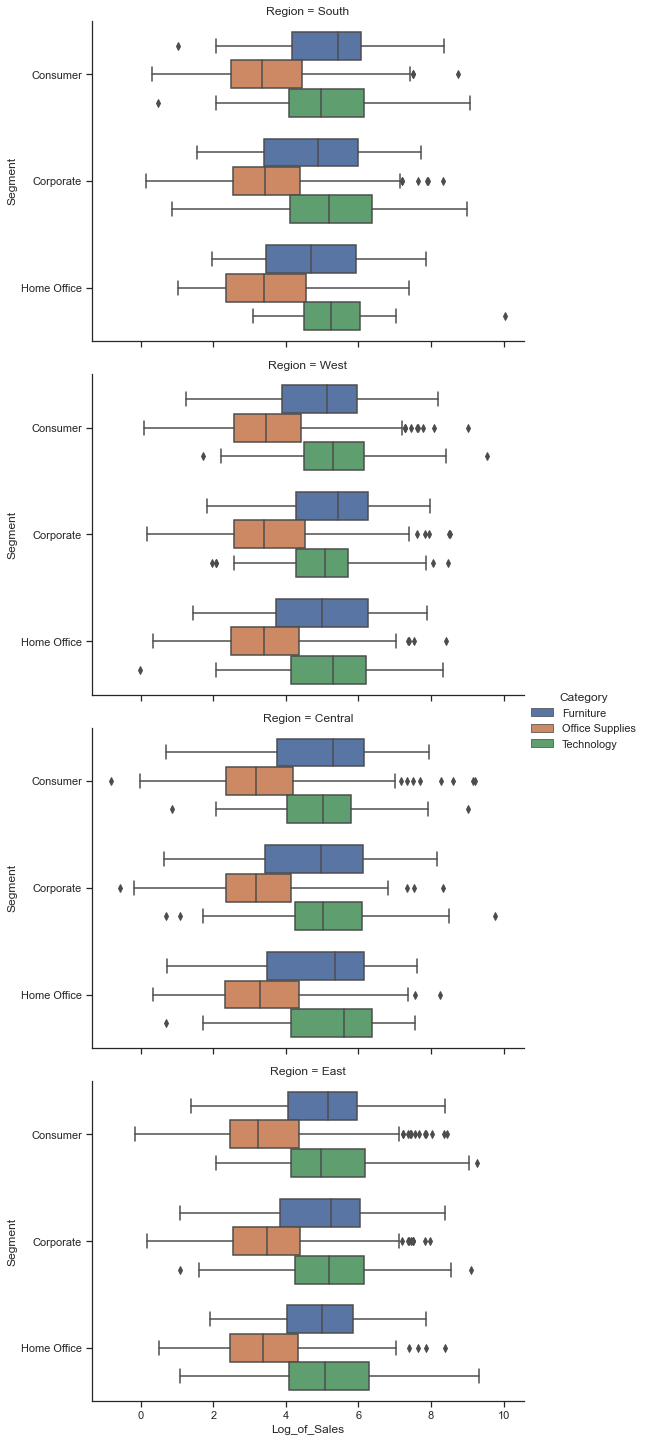

<Figure size 1080x576 with 0 Axes>

In [147]:
sns.set_theme(style='ticks', color_codes=True)
sns.catplot(data=df_train, x='Log_of_Sales', y='Segment', hue='Category', kind='box', row='Region', orient='h', aspect=1.5, height=5)

plt.figure(figsize = (15,8))

In [148]:
# The plots above show that the categories have normal distributions

#### Time Series Plots

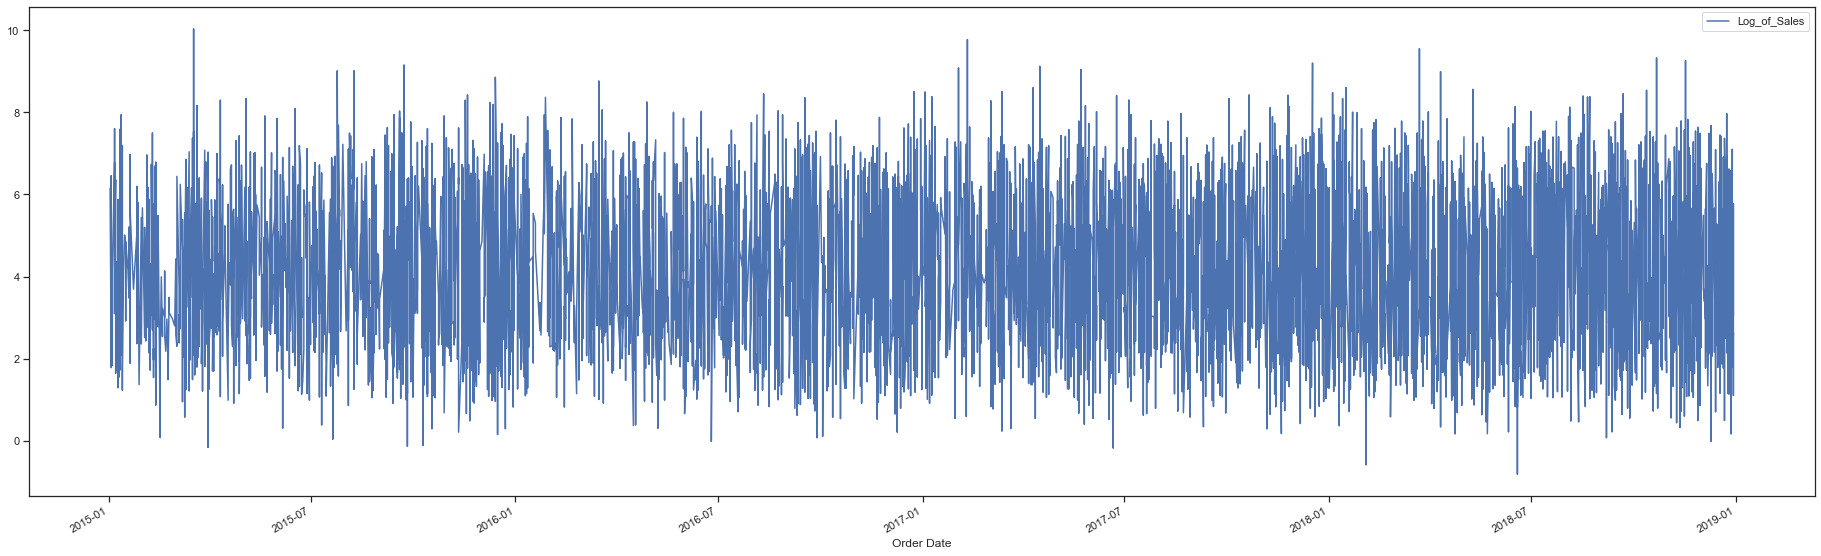

In [159]:
# Is it stationary?
## Plotting sales over time could be hlepful to understand if the data is stationary and would allow for certain types of forecasting models

df_train_order = df_train[['Order Date', 'Sales', 'Log_of_Sales']]
df_train_order.plot('Order Date', 'Log_of_Sales')
plt.rcParams['figure.figsize'] = [30,10]

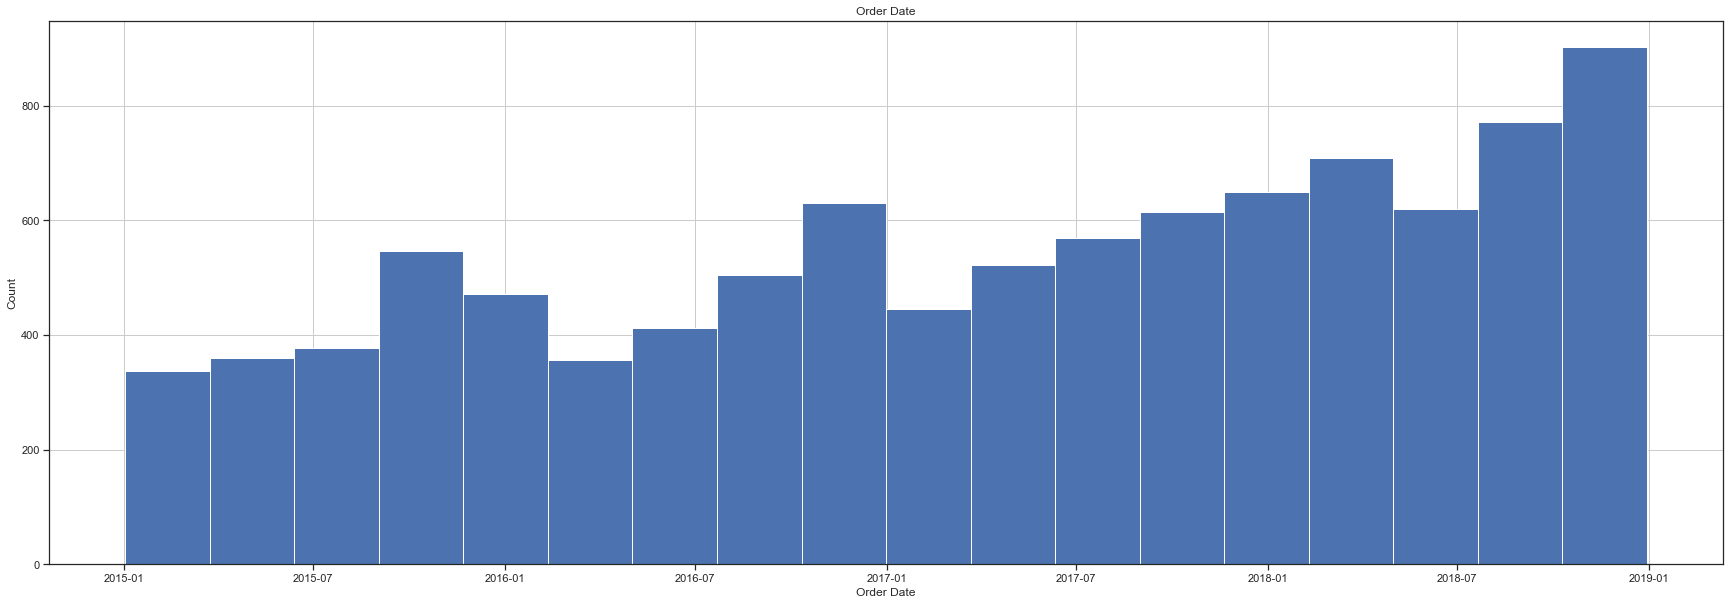

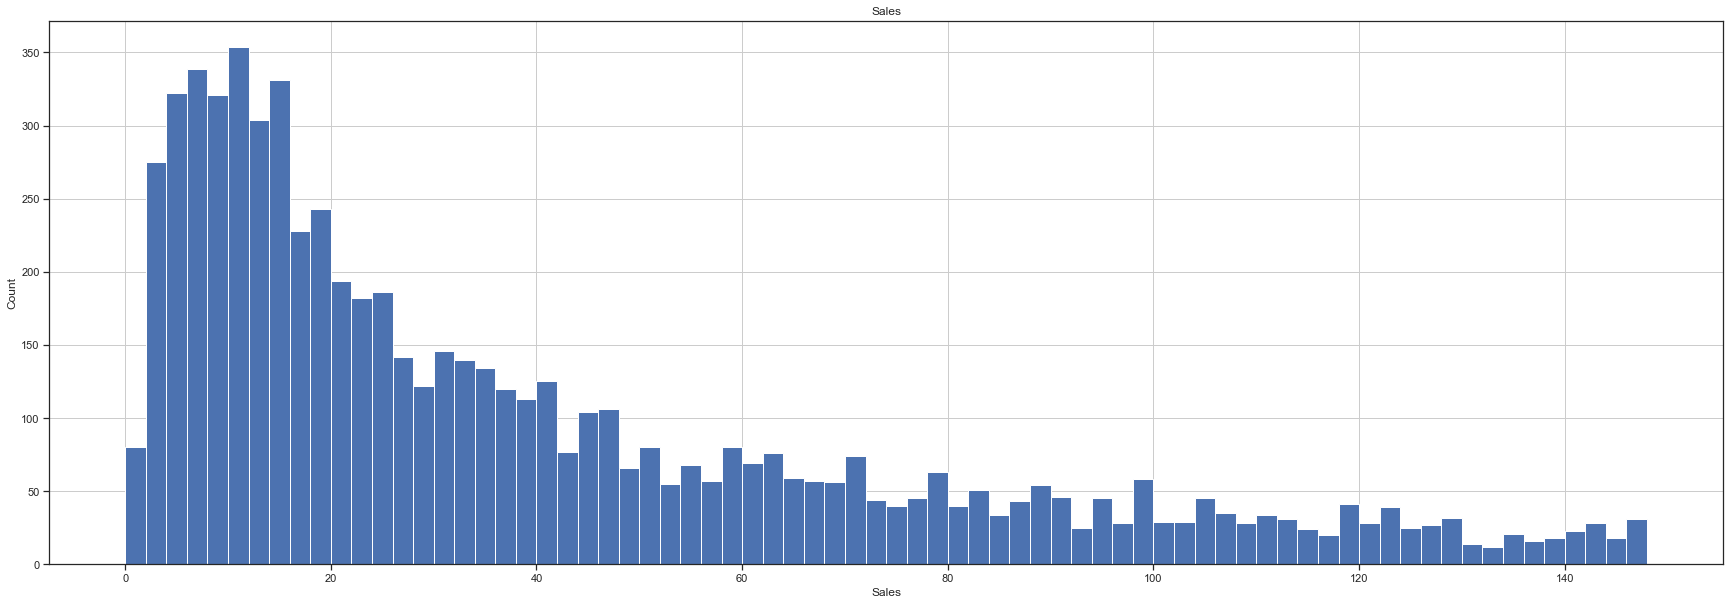

In [163]:
df_train_order.hist('Order Date', bins=18)
plt.xlabel('Order Date')
plt.ylabel('Count')
binwidth = 2
df_train_order.hist('Sales', bins=range(int(min(df_train_order['Sales'])), 150, binwidth))
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

In [168]:
# Dickey-Fuller Test to better understand if data is stationary
from statsmodels.tsa.stattools import adfuller

X = df_train[['Order Date', 'Sales']].set_index('Order Date')
X.head()
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -98.335553
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [164]:
### Time series data looks flat and could be stationary, but its difficult to tell and an 
##  Augmented Dickey-Fuller Test shows that the p-value is less than 0.05, thus the data is Stationsary

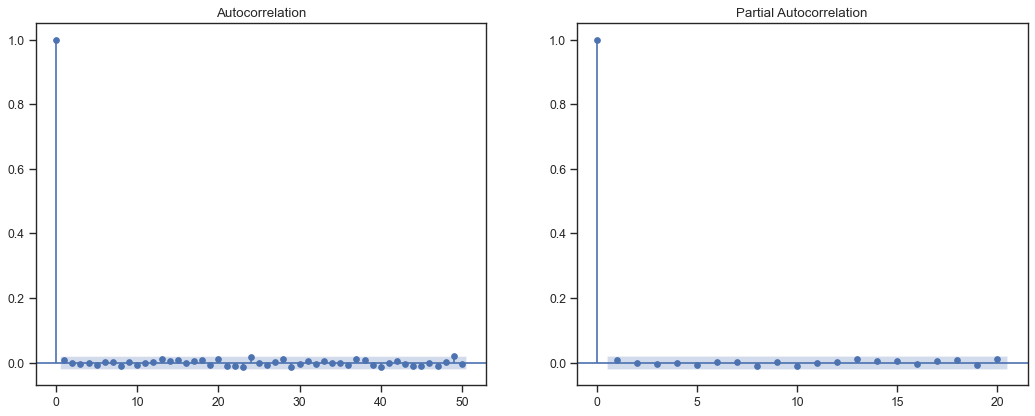

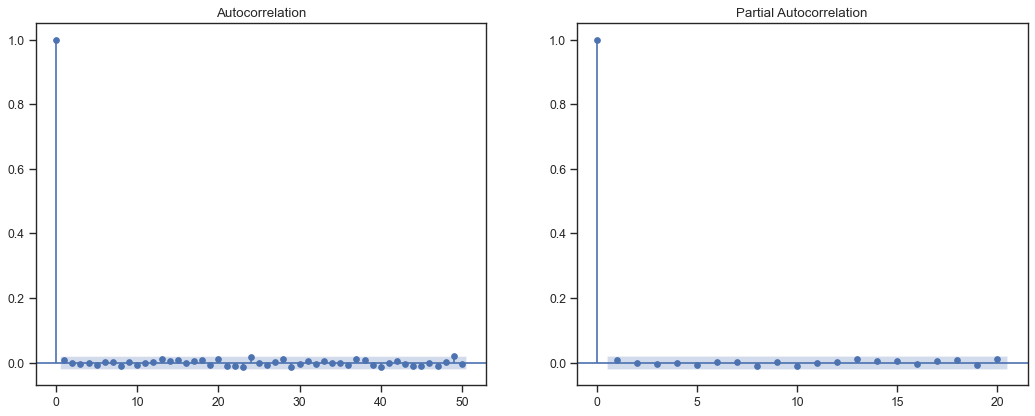

In [170]:
# Autocorrelation and Partial Autocorrelation Plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(df_train.Sales.tolist(), ax=ax1, lags=50)
plot_pacf(df_train.Sales.tolist(), ax=ax2, lags=20, method='ywm')

In [171]:
### Plots show one siginificant spike at the beginning AR1

In [174]:
df_train_rolling = df_train[['Order Date', 'Sales', 'Log_of_Sales']].sort_values(by='Order Date')
df_train_rolling[['Sales', 'Log_of_Sales']] = df_train_rolling[['Sales','Log_of_Sales']].rolling(7).mean()
df_train_rolling.tail(0)

,Order Date,Sales,Log_of_Sales


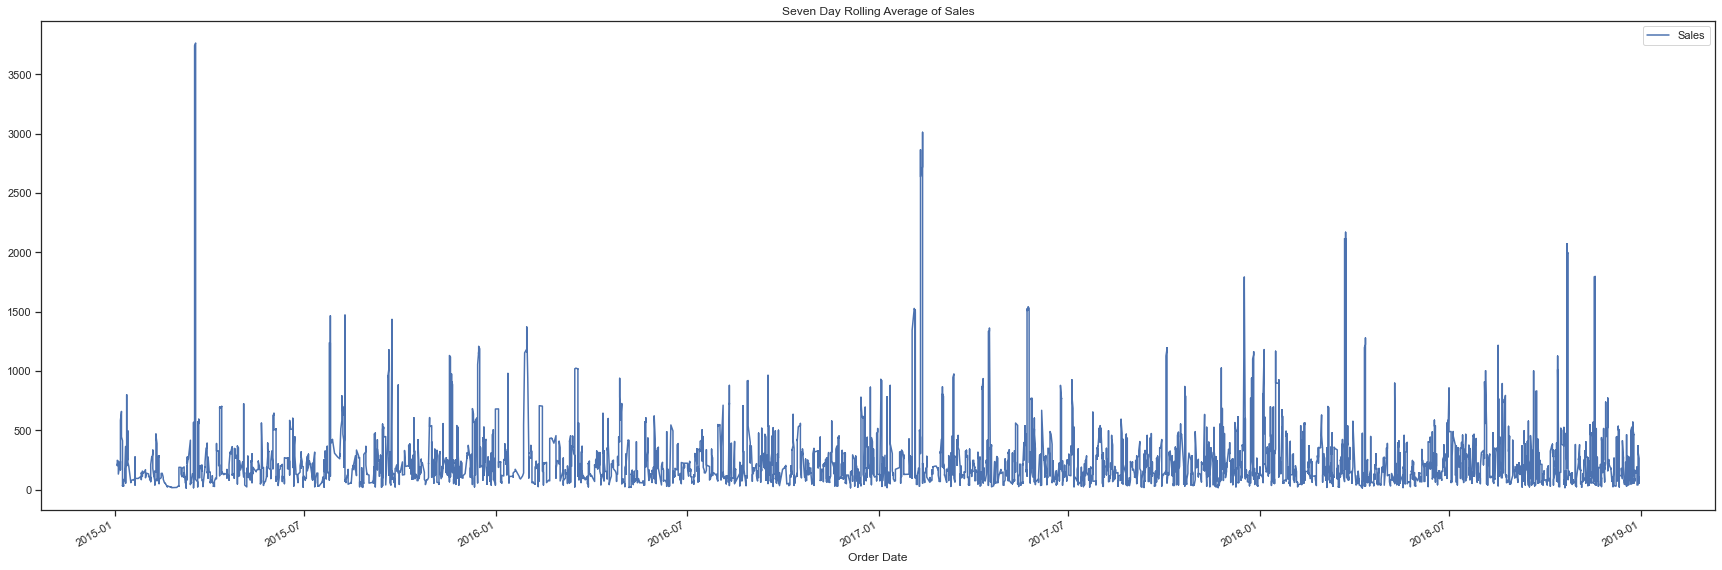

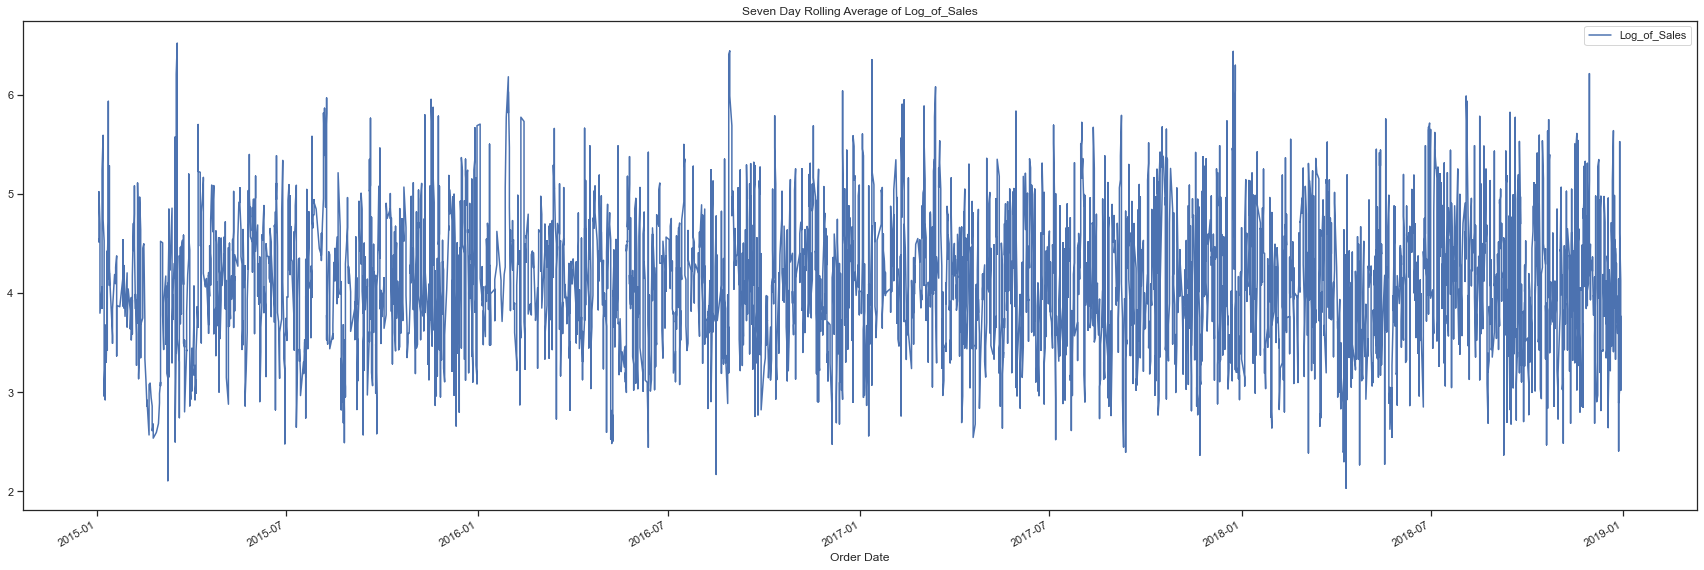

In [176]:
df_train_rolling.plot('Order Date', 'Sales')
plt.title('Seven Day Rolling Average of Sales')
df_train_rolling.plot("Order Date", 'Log_of_Sales')
plt.title("Seven Day Rolling Average of Log_of_Sales")
plt.show()

### Test-Train Split

In [185]:
# create montly aggregated transaction dataframe to test-train from

df_profit= df.pivot_table( index='Order Date',values='Sales', columns='Segment' ,aggfunc='sum')
df_profit.head()

Segment,Consumer,Corporate,Home Office
Order Date,,,
2015-01-02,468.900,NaN,NaN
2015-01-03,1545.623,NaN,657.528
2015-01-04,46.688,73.200,NaN
2015-01-06,904.130,204.080,4080.310
2015-01-07,NaN,601.024,NaN


In [236]:
# Perform the trai-test split - take the 42 months as a the train data 
# and the 6 months as the test data

train_len = 42
train = df_profit[0:train_len] # first 42 months as training set
test = df_profit[train_len:] # last 6 months as test set


In [237]:
train.shape

(42, 3)

In [238]:
train.head()

Segment,Consumer,Corporate,Home Office
Order Date,,,
2015-01-02,468.900,NaN,NaN
2015-01-03,1545.623,NaN,657.528
2015-01-04,46.688,73.200,NaN
2015-01-06,904.130,204.080,4080.310
2015-01-07,NaN,601.024,NaN


#### Calucualte the CoV on Sales for each Segment on the Trained data

- We compare the variance between the segments using the coefficient of variation which will normalize the standard
- We want to forecast the sales where the market segment where there is less variation in sales

In [239]:
mean=np.mean(train)
std= np.std(train)

CoV_df= pd.DataFrame(mean)
CoV_df['std']= std
CoV_df['CoV'] = std/mean
CoV_df= CoV_df.reset_index()
CoV_df.columns= ['Segment', 'Mean', 'Std', 'CoV']
CoV_df.sort_values(by='CoV', ascending= True, inplace = True)
CoV_df

,Segment,Mean,Std,CoV
1,Corporate,390.221684,378.416961,0.969749
0,Consumer,820.781187,1153.867034,1.405816
2,Home Office,637.586333,1100.963129,1.726767


In [240]:
lowest_CoV_value = min(CoV_df['CoV'])
lowest_CoV_value

0.9697486742575292

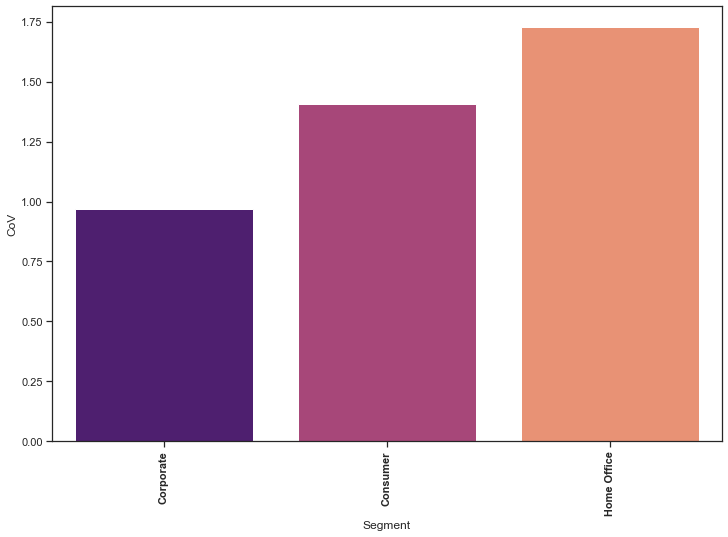

In [241]:
sns.barplot(x='Segment', y='CoV', data=CoV_df, palette='magma')
plt.xticks(rotation = 90, fontweight='bold')
plt.show()

In [203]:
# We can see that the Lowest CoV is 0.96975
# From this we can infer that the corresponding Segment is 'Corporate' 
# The most profitable segment is corporate

### Time Series Analysis

In [242]:
# Filter the data for best segement - Corporate
# Drop the other 2 segments and only keep Corporate - which we found to be the most consistently profitable
corp_df = df[(df.Segment=='Corporate')]
corp_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Log_of_Sales
2,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2.682390
21,CA-2017-137330,2017-09-12,2017-12-13,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,Nebraska,68025.0,Central,OFF-AR-10000246,Office Supplies,Art,Newell 318,19.460,2.968361
22,CA-2017-137330,2017-09-12,2017-12-13,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,Nebraska,68025.0,Central,OFF-AP-10001492,Office Supplies,Appliances,"Acco Six-Outlet Power Strip, 4' Cord Length",60.340,4.099995
35,CA-2017-117590,2017-08-12,2017-10-12,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080.0,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7.000830
36,CA-2017-117590,2017-08-12,2017-10-12,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080.0,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.920,5.251854


In [243]:
corp_df.shape

(2953, 18)

In [244]:
# Group data based on order date and finding sales
data=pd.DataFrame(corp_df.groupby('Order Date')['Sales'].sum())
data.head()


,Sales
Order Date,
2015-01-04,73.200
2015-01-06,204.080
2015-01-07,601.024
2015-01-08,202.896
2015-01-11,1211.416


In [245]:
data.shape

(824, 1)

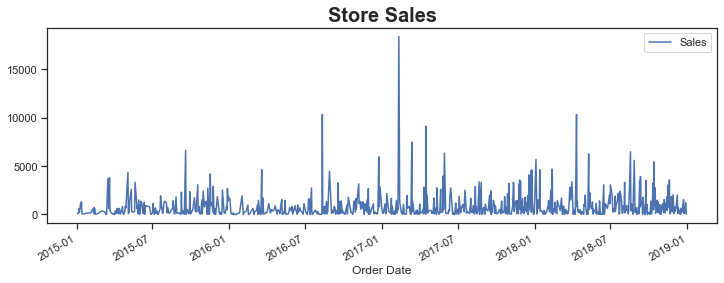

In [246]:
# Plot time series data
data.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Store Sales', fontweight='bold', size=20)
plt.show(block=False)

In [247]:
data.isnull().sum()

# no missing values

Sales    0
dtype: int64

In [250]:
# Split time series data into training and test set
train_len = 42
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

#### Build and Evaluate Time Series Forecast

In [258]:
# Split time series data into training and test set
# Perform the train-test split for Corporate segment to take 42 months data as the train ata 
# and the 6 months as the test data
train_len = 42
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

In [259]:
# SImple time-series methods
# Naive Method - Forecast = Last month's sales

y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1] # last observation in the train data

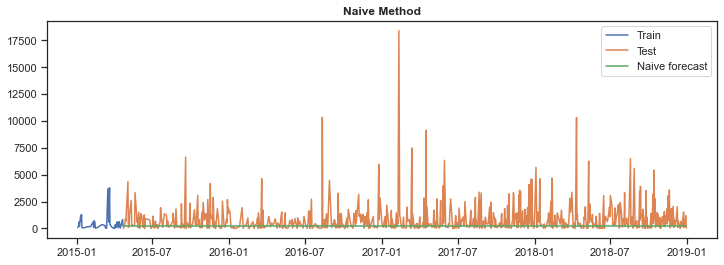

In [260]:
# Plot Train, Train, forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method', fontweight= 'bold')
plt.show()

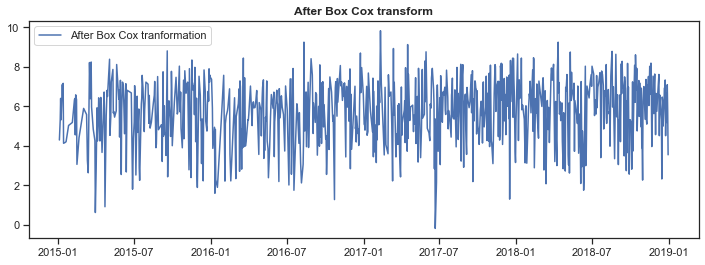

In [267]:
#Box Cox transormation to make variance constant
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Sales'], lmbda=0), index = data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform', fontweight= 'bold')
plt.show()

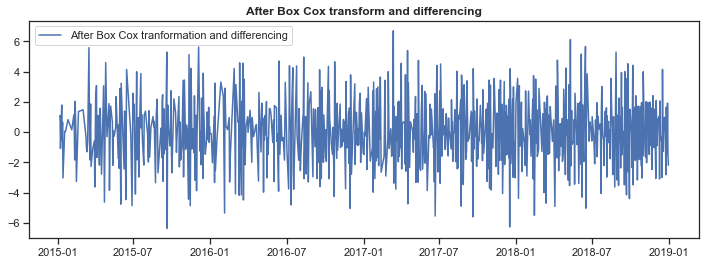

In [268]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing', fontweight='bold')
plt.show()

In [272]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [274]:
# Auto Regression Moving Average Methon (ARMA)
# Models the future observation as linear regression of one or more past observations and past forecast errors
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox, order=(1,1,1))
model_fit = model.fit()
print(model_fit.params)

const       -0.012787
ar.L1.D.y    0.236250
ma.L1.D.y   -1.000000
dtype: float64


In [280]:
# Seasonal auto regressive integrated moving average (SARIMA)
# SARIMA Model has both non-seasonal and seasonal elements
# brings all the features of an ARIMA model but with seasonality
# has six parameters along with seasonality

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1       0.169566
ma.L1      -0.999329
ar.S.L12    0.065970
ma.S.L12   -0.997297
sigma2      2.486194
dtype: float64


In [282]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)